# Hypergraph Matching Algorithms Tutorial

This tutorial highlights the implementation and usage of several hypergraph matching algorithms as presented in our publication: [Distributed Algorithms for Matching in Hypergraphs](https://arxiv.org/abs/2009.09605v1).

## Algorithms Covered
- Greedy Matching
- Iterated Sampling
- HEDCS Matching

We will demonstrate how to use these algorithms with example hypergraphs and compare their performance.

In [1]:
import numpy as np
import hypernetx as hnx
from hypernetx.classes.hypergraph import Hypergraph
from hypernetx.algorithms.matching_algorithms import greedy_matching, iterated_sampling, HEDCS_matching
import random
import logging
import time
import matplotlib.pyplot as plt

## Example Hypergraph

In [2]:
# Example hypergraph data
hypergraph_data = {
    0: (1, 2, 3),
    1: (4, 5, 6),
    2: (7, 8, 9),
    3: (1, 4, 7),
    4: (2, 5, 8),
    5: (3, 6, 9)
}

# Creating a Hypergraph
hypergraph = Hypergraph(hypergraph_data)

## Greedy Matching Algorithm
The Greedy Matching algorithm constructs a random k-partitioning of the hypergraph and finds a maximal matching. 

### Parameters:
- `hypergraph`: The input hypergraph.
- `k`: The number of partitions to divide the hypergraph into.

### Example Usage:

In [3]:
k = 3
greedy_result = greedy_matching(hypergraph, k)
print("Greedy Matching Result:", greedy_result)

Greedy Matching Result: [(7, 8, 9), (1, 2, 3), (4, 5, 6)]


## Iterated Sampling Algorithm
The Iterated Sampling algorithm uses sampling to find a maximal matching in a d-uniform hypergraph. 

### Parameters:
- `hypergraph`: The input hypergraph.
- `s`: The number of samples to use in the algorithm.

### Example Usage:

In [4]:
s = 10
iterated_result = iterated_sampling(hypergraph, s)
print("Iterated Sampling Result:", iterated_result)

Iterated Sampling Result: [[7, 8, 9], [1, 2, 3], [4, 5, 6]]


## HEDCS Matching Algorithm
The HEDCS Matching algorithm constructs a Hyper-Edge Degree Constrained Subgraph (HEDCS) to find a maximal matching. 

### Parameters:
- `hypergraph`: The input hypergraph.
- `s`: The number of samples to use in the algorithm.

### Example Usage:

In [5]:
hedcs_result = HEDCS_matching(hypergraph, s)
print("HEDCS Matching Result:", hedcs_result)

HEDCS Matching Result: [[1, 2, 3], [4, 5, 6], [7, 8, 9]]


## Performance Comparison
We will compare the performance of the algorithms on large random hypergraphs.

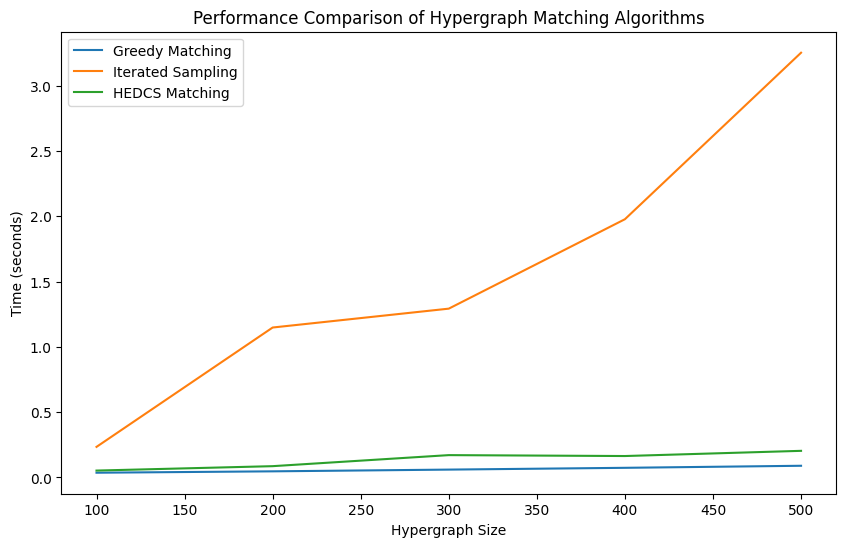

In [6]:
def generate_random_hypergraph(n, d, m):
    edges = {f'e{i}': random.sample(range(1, n+1), d) for i in range(m)}
    return Hypergraph(edges)

# Generate random hypergraphs of increasing size
sizes = [100, 200, 300, 400, 500]
greedy_times = []
iterated_times = []
hedcs_times = []

for size in sizes:
    hypergraph = generate_random_hypergraph(size, 3, size)
    
    start_time = time.time()
    greedy_matching(hypergraph, k)
    greedy_times.append(time.time() - start_time)
    
    start_time = time.time()
    iterated_sampling(hypergraph, s, max_iterations = 500)
    iterated_times.append(time.time() - start_time)
    
    start_time = time.time()
    HEDCS_matching(hypergraph, s)
    hedcs_times.append(time.time() - start_time)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sizes, greedy_times, label='Greedy Matching')
plt.plot(sizes, iterated_times, label='Iterated Sampling')
plt.plot(sizes, hedcs_times, label='HEDCS Matching')
plt.xlabel('Hypergraph Size')
plt.ylabel('Time (seconds)')
plt.title('Performance Comparison of Hypergraph Matching Algorithms')
plt.legend()
plt.show()

## Conclusion
In this tutorial, we demonstrated the implementation and usage of several hypergraph matching algorithms. We also compared their performance on random hypergraphs of increasing size.

For more details, please refer to our publication: [Distributed Algorithms for Matching in Hypergraphs](https://arxiv.org/abs/2009.09605v1).